In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the processed Mumbai dataset
df = pd.read_csv("../data/processed/mumbai_summary.csv")

In [29]:
df.head()

,SPID,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,...,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,BALCONY_NUM,FLOOR_NUM,PRICE_CLEANED,AREA_CLEANED,PRICE_PER_SQFT
0,69306824,X69306824,S,New brand 3bhk farmhouse with 68 guntha land f...,Farm House,Mumbai Beyond Thane,1.0,Freehold,3.0,477941.0,...,14.0,[{'text': '9 Hospitals'}],NaN,NaN,"{'CITY': '274', 'CITY_NAME': 'Mumbai Beyond Th...",1.0,NaN,32500000.0,74051.0,438.886713
1,70915032,R70915032,S,Our residential plots & commercial plots are a...,Residential Land,Navi Mumbai,1.0,Freehold,NaN,381.0,...,NaN,NaN,city prop,city prop,"{'CITY': '15', 'CITY_NAME': 'Navi Mumbai', 'BU...",NaN,NaN,415000.0,1089.0,381.083563
2,70916930,G70916930,P,Spacious bedroom with \nDouble size bed with d...,Residential Apartment,Thane,NaN,NaN,1.0,51.0,...,49.0,"[{'text': '2 Religious Places'}, {'text': '1 A...",Highway Darshan,Highway Darshan,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",1.0,NaN,20000.0,390.0,51.282051
3,70484400,H70484400,P,Pg for boys and girls available with price of:...,Residential Apartment,Thane,NaN,NaN,4.0,6.0,...,39.0,"[{'text': '1 Shopping'}, {'text': '3 Religious...","Terraform Petunia, G Corp","Terraform Petunia, G Corp","{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",2.0,NaN,8000.0,1250.0,6.400000
4,70484128,A70484128,P,Pg for boys and girls in thane with below pric...,Residential Apartment,Thane,NaN,NaN,4.0,6.0,...,50.0,"[{'text': '1 Shopping'}, {'text': '2 Religious...",nul,nul,"{'CITY': '219', 'CITY_NAME': 'Thane', 'BUILDIN...",2.0,NaN,8000.0,1250.0,6.400000


In [30]:
df.shape

(9255, 58)

In [31]:
df.columns

Index(['SPID', 'PROP_ID', 'PREFERENCE', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY',
       'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE',
       'POSTING_DATE', 'UPDATE_DATE', 'CLASS', 'RES_COM', 'PROP_NAME',
       'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'PROJ_ID',
       'BUILDING_ID', 'VERIFIED', 'MAP_DETAILS', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'AMENITIES', 'ALT_TAG', 'PRODUCT_TYPE', 'TOP_USPS',
       'EXPIRY_DATE', 'PROPERTY_TYPE__U', 'AREA', 'SECONDARY_AREA', 'PRICE',
       'PROP_HEADING', 'VALUE_LABEL', 'CLASS_HEADING', 'CLASS_LABEL',
       'REGISTER_DATE__U', 'REGISTERED_DAYS', 'PRIMARY_TAGS', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'SOCIETY_NAME',
       'BUILDING_NAME', 'location', 'BALCONY_NUM', 'FLOOR_NUM',
       'PRICE_CLEANED', 'AREA_CLEANED', 'PRICE_PER_SQFT'],
      dtype='object')

In [32]:
df.dtypes

SPID                            int64
PROP_ID                        object
PREFERENCE                     object
DESCRIPTION                    object
PROPERTY_TYPE                  object
CITY                           object
TRANSACT_TYPE                 float64
OWNTYPE                        object
BEDROOM_NUM                   float64
PRICE_PER_UNIT_AREA           float64
FURNISH                         int64
FACING                         object
AGE                            object
TOTAL_FLOOR                    object
FEATURES                       object
REGISTER_DATE                  object
POSTING_DATE                  float64
UPDATE_DATE                     int64
CLASS                          object
RES_COM                        object
PROP_NAME                      object
PROPERTY_NUMBER                 int64
MIN_PRICE                       int64
MAX_PRICE                       int64
PRICE_SQFT                    float64
PROJ_ID                         int64
BUILDING_ID 

In [33]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

FLOOR_NUM                     7240
TOP_USPS                      5846
FACING                        5128
AMENITIES                     4290
BALCONY_NUM                   4111
VALUE_LABEL                   2637
OWNTYPE                       2637
TRANSACT_TYPE                 2637
TOTAL_FLOOR                   1314
ALT_TAG                       1057
POSTING_DATE                   411
FORMATTED_LANDMARK_DETAILS     176
TOTAL_LANDMARK_COUNT           176
PROP_NAME                      109
SOCIETY_NAME                   109
BUILDING_NAME                  109
BEDROOM_NUM                     73
AGE                             64
dtype: int64


In [34]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SPID,9255.0,NaN,NaN,NaN,69067039.063965,4944900.382882,5344653.0,69464478.0,70366558.0,70692177.0,71024450.0
PROP_ID,9255,9250,H68802070,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PREFERENCE,9255,3,S,6618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DESCRIPTION,9255,9055,All modes of public conveyance such as tmt/nmt...,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROPERTY_TYPE,9255,7,Residential Apartment,8877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,9255,9,Navi Mumbai,2165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRANSACT_TYPE,6618.0,NaN,NaN,NaN,1.612874,0.48713,1.0,1.0,2.0,2.0,2.0
OWNTYPE,6618,4,Freehold,5672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEDROOM_NUM,9182.0,NaN,NaN,NaN,2.225986,0.998315,1.0,2.0,2.0,3.0,9.0
PRICE_PER_UNIT_AREA,9255.0,NaN,NaN,NaN,22845.972663,126010.616998,0.0,100.0,16503.0,28000.0,8018867.0


## Univariate Analysis

### Numerical Columns

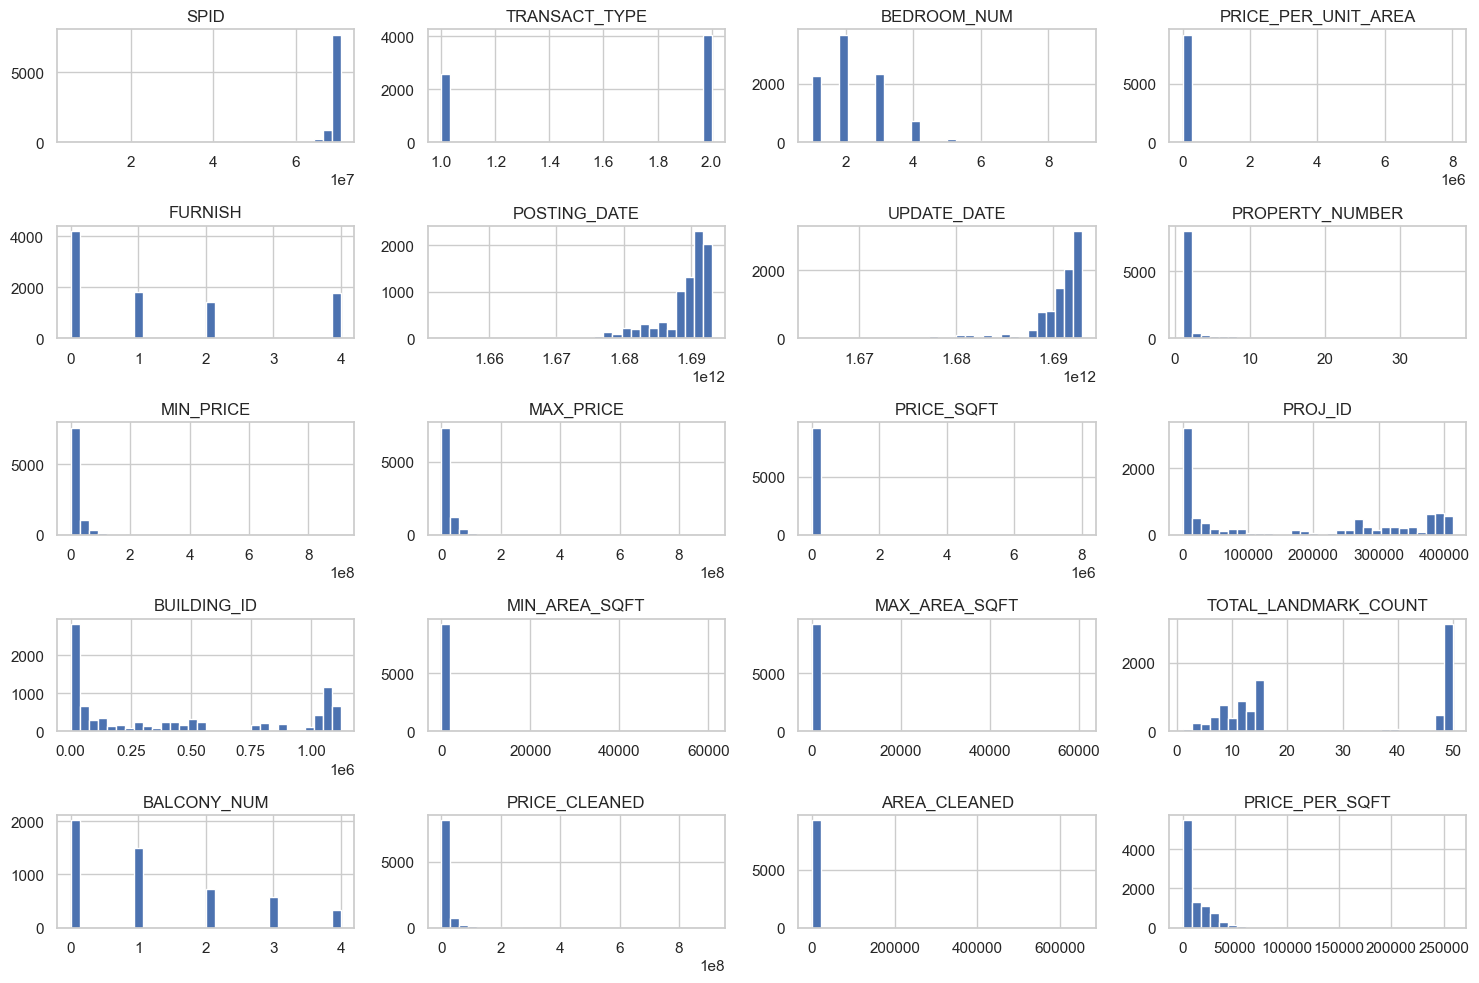

In [35]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

### Categorical Columns

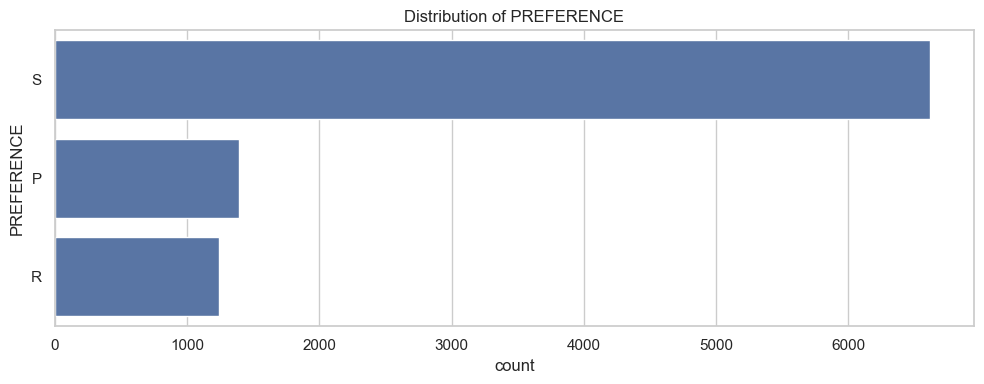

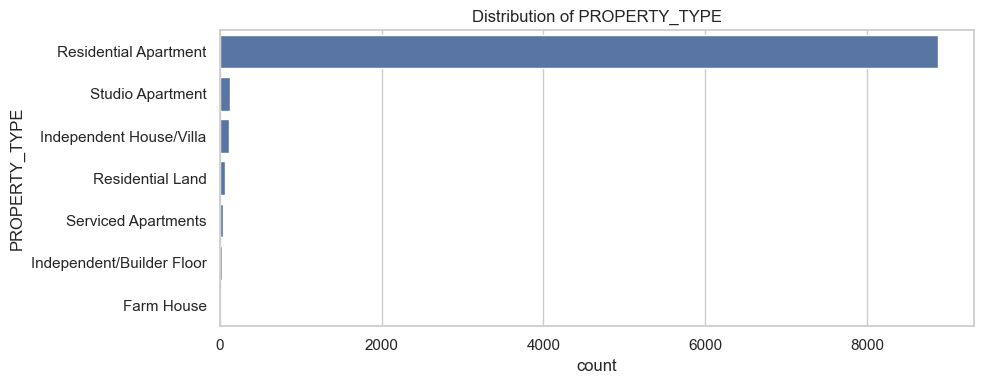

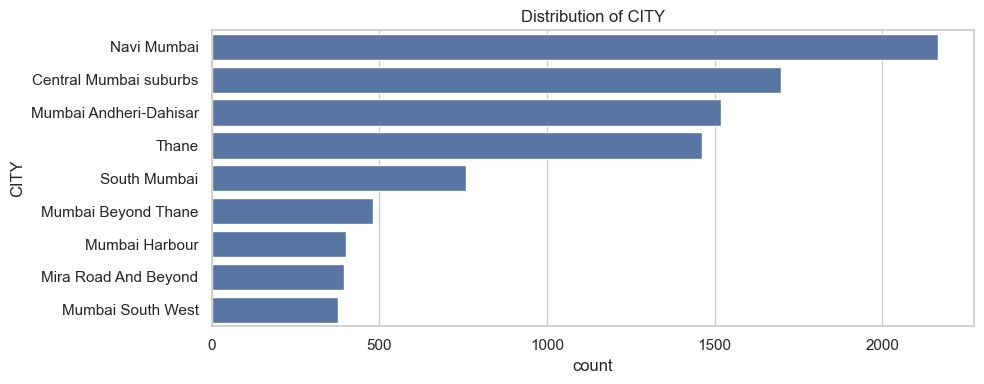

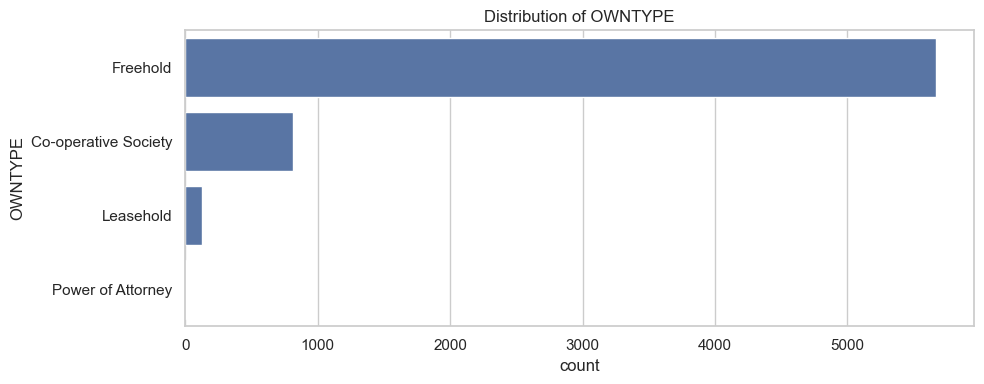

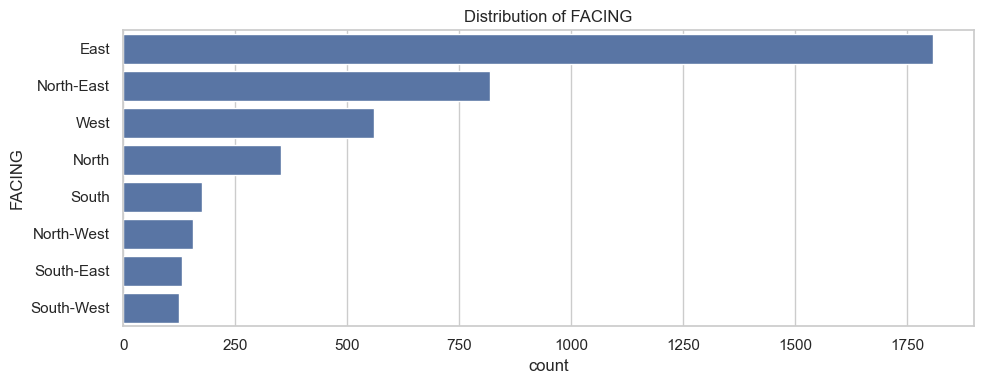

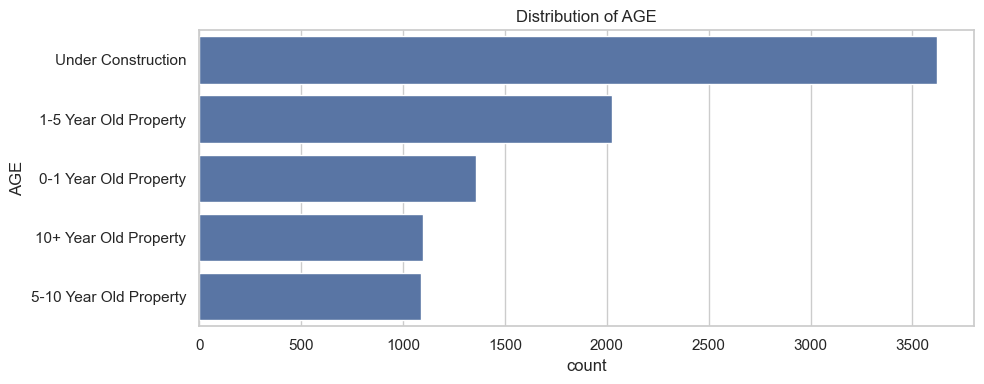

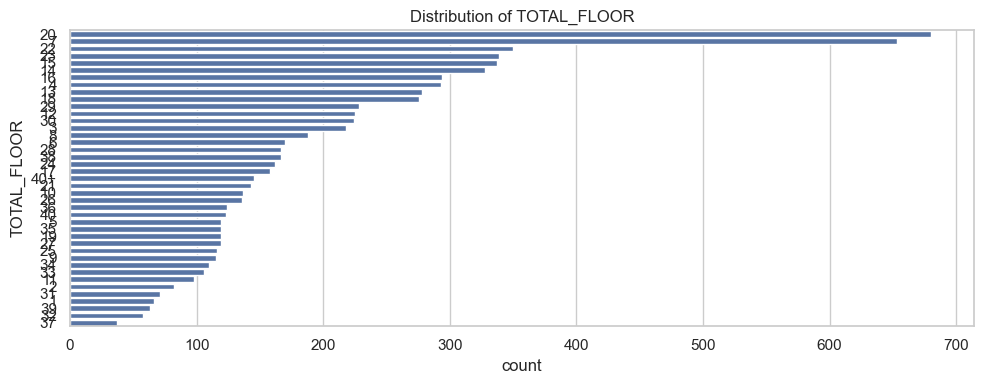

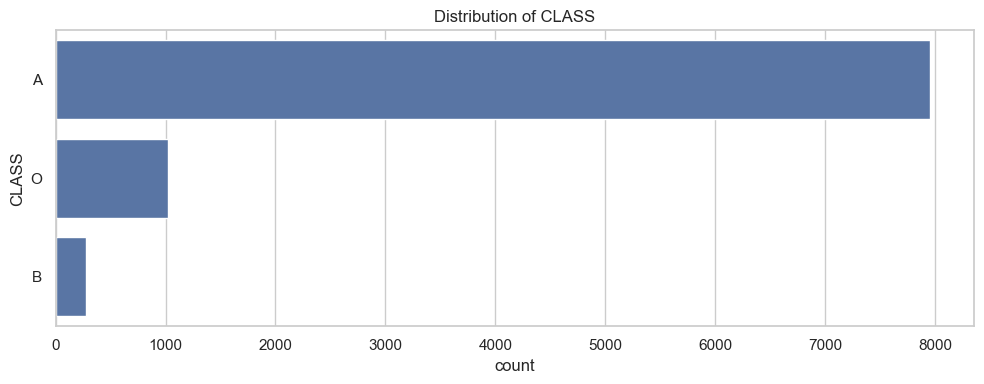

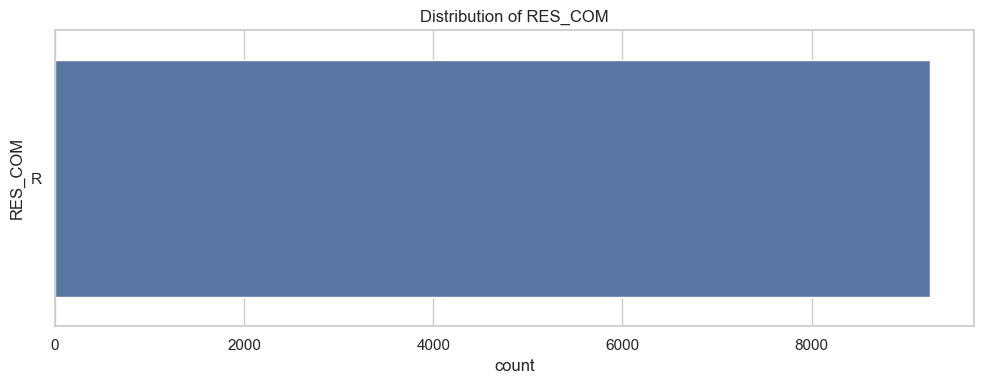

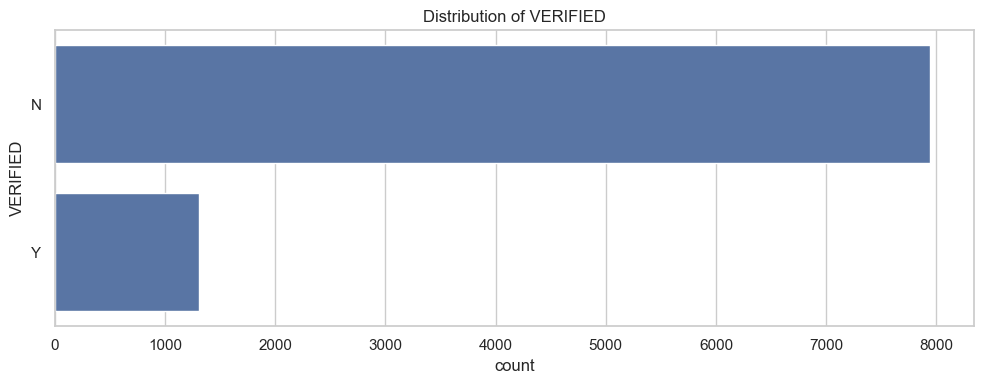

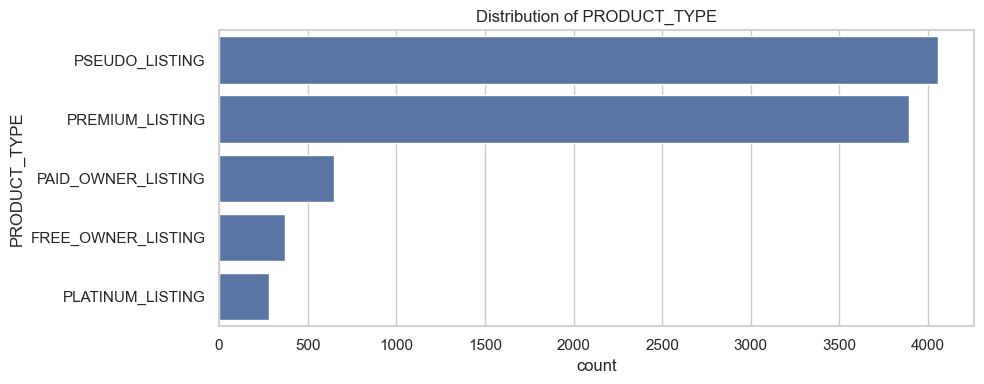

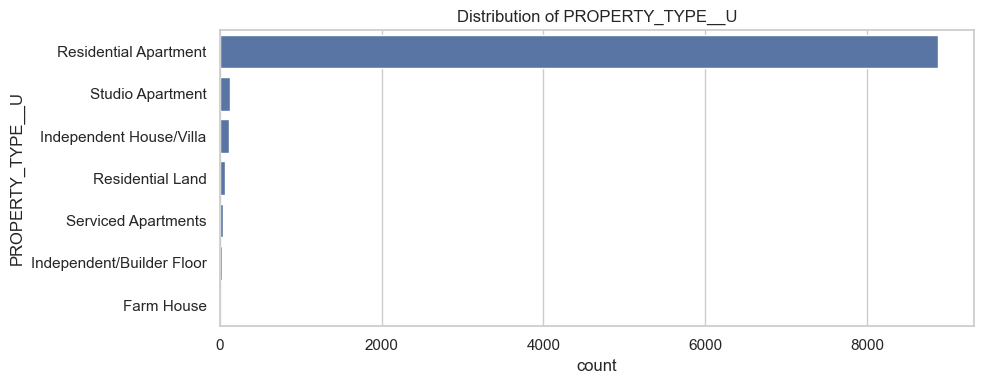

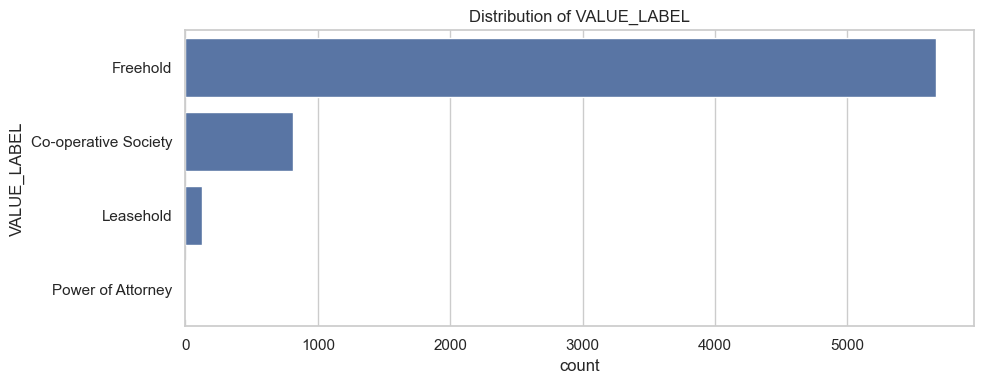

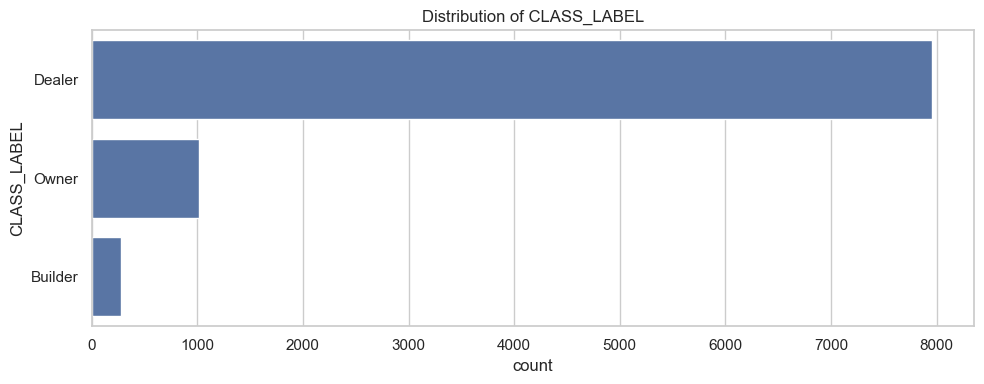

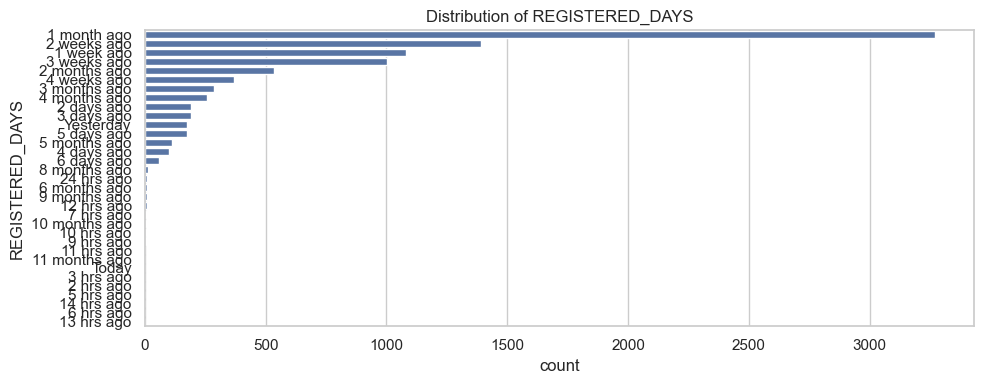

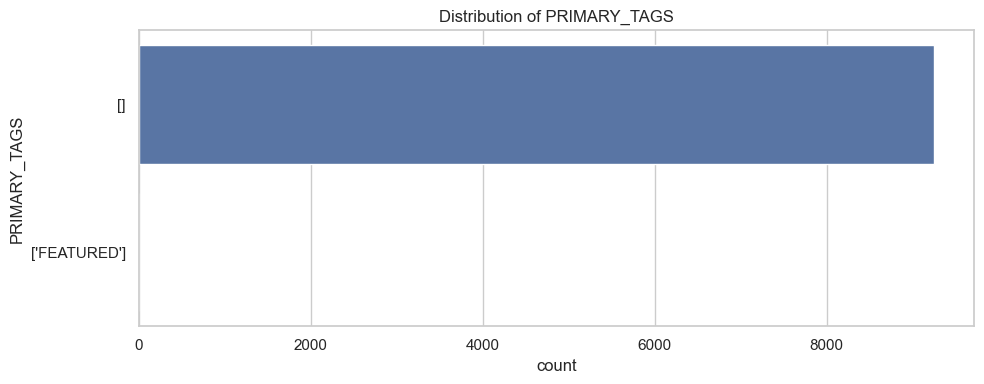

In [36]:
cat_cols = df.select_dtypes(include='object').nunique()
cat_cols = cat_cols[cat_cols < 50].index  # Focus on lower-cardinality columns

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

## Price and Area Distributoins

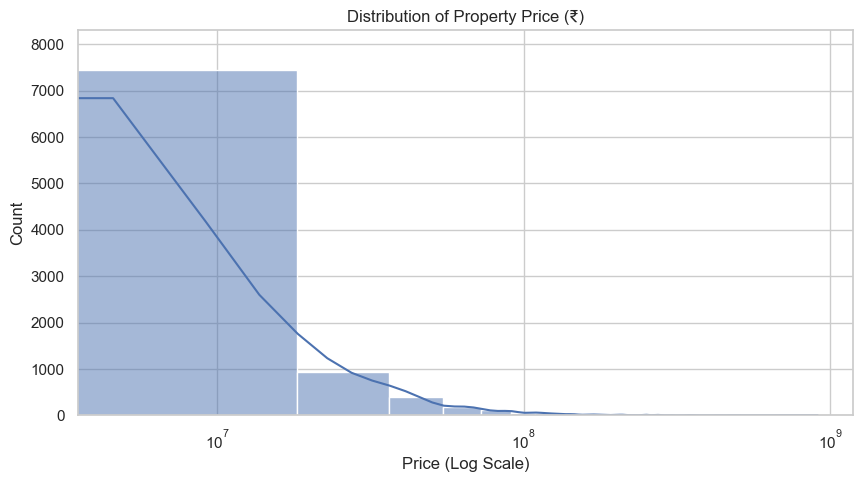

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PRICE_CLEANED'], bins=50, kde=True)
plt.title("Distribution of Property Price (₹)")
plt.xscale('log')
plt.xlabel("Price (Log Scale)")
plt.show()

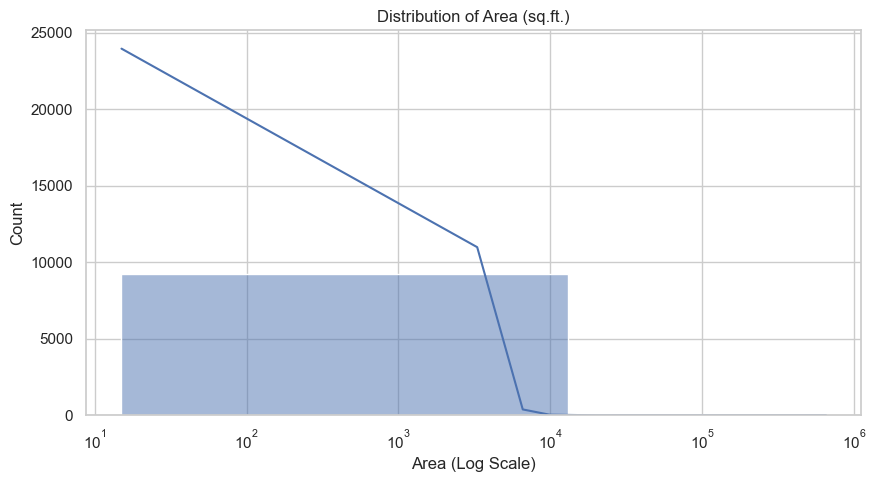

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AREA_CLEANED'], bins=50, kde=True)
plt.title("Distribution of Area (sq.ft.)")
plt.xscale('log')
plt.xlabel("Area (Log Scale)")
plt.show()

## Price per Sq.Ft by City Locality

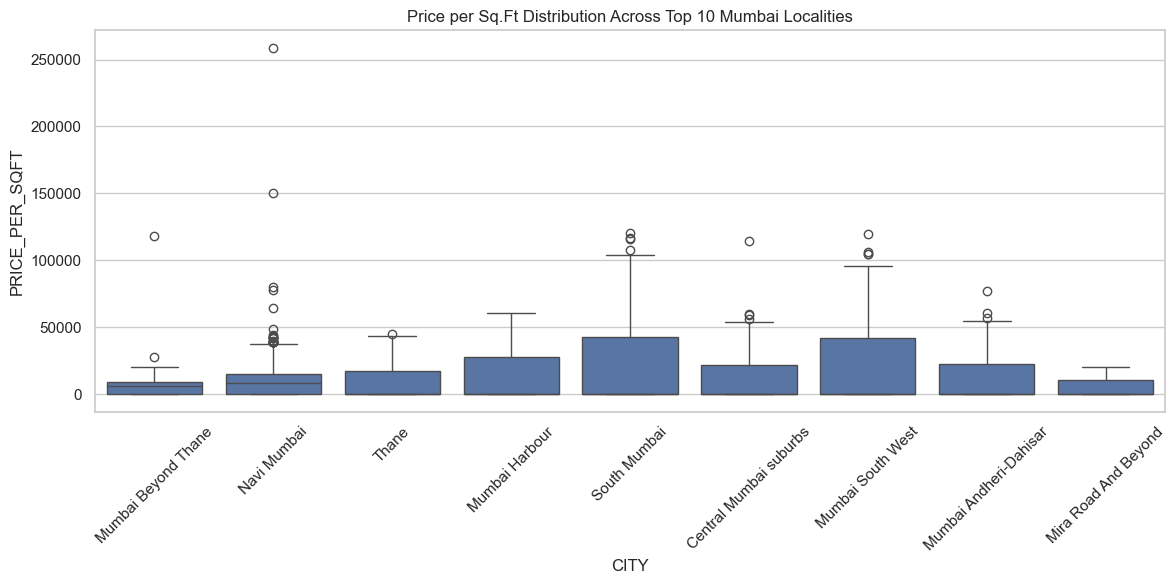

In [39]:
plt.figure(figsize=(12, 6))
top_cities = df['CITY'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['CITY'].isin(top_cities)], x='CITY', y='PRICE_PER_SQFT')
plt.xticks(rotation=45)
plt.title("Price per Sq.Ft Distribution Across Top 10 Mumbai Localities")
plt.tight_layout()
plt.show()

## Correlation Matrix

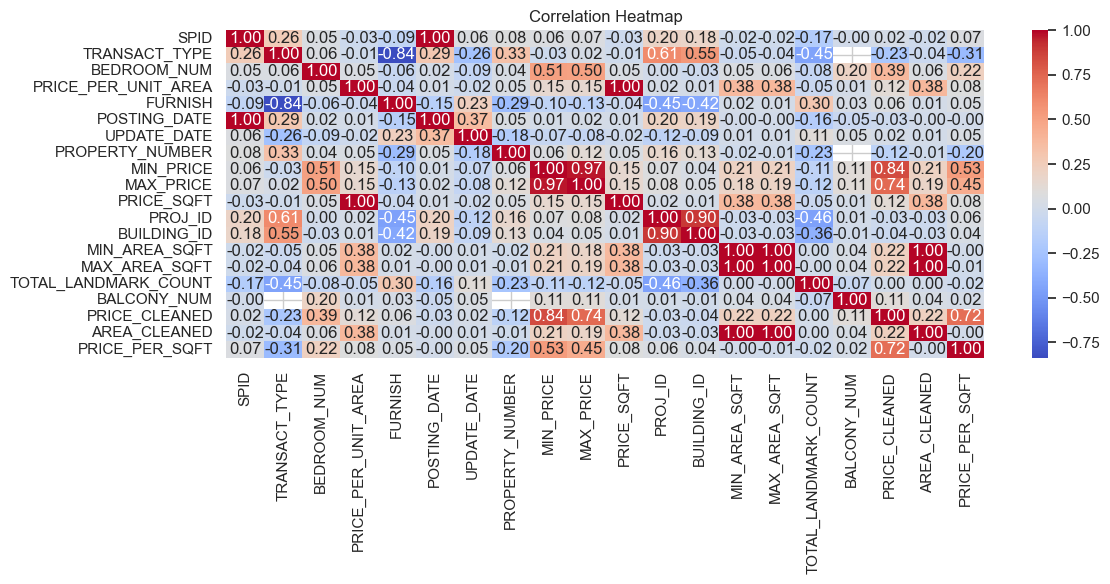

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## Impact of Bedrooms on Price per Sq. Ft.

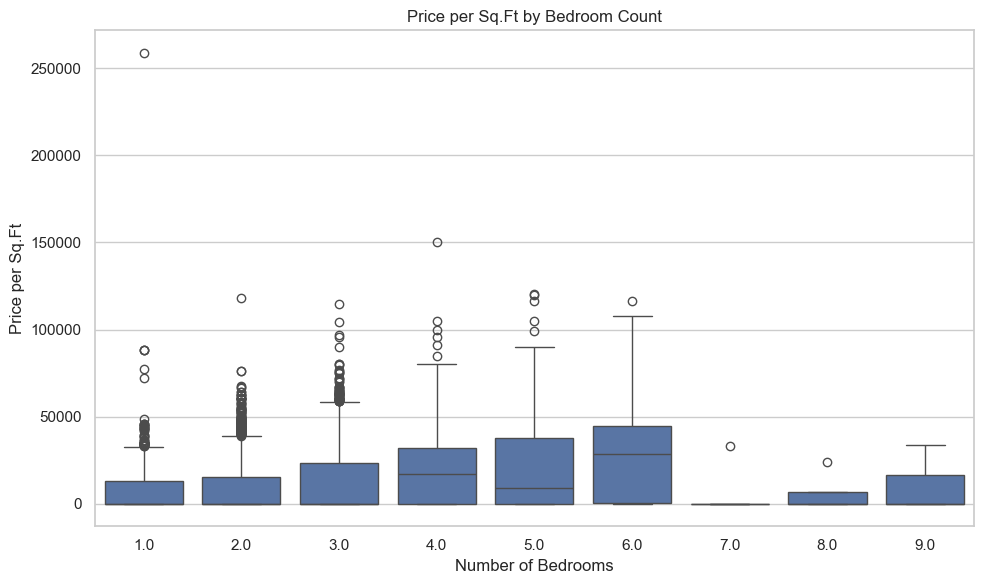

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["BEDROOM_NUM"].astype("category"), y=df["PRICE_PER_SQFT"])
plt.title("Price per Sq.Ft by Bedroom Count")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price per Sq.Ft")
plt.tight_layout()
plt.show()

## Outlier Detection (Price per Sq.Ft)

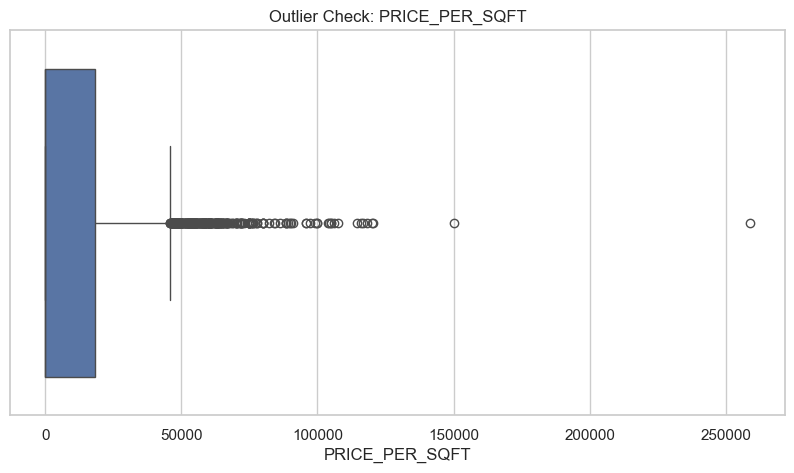

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['PRICE_PER_SQFT'])
plt.title("Outlier Check: PRICE_PER_SQFT")
plt.show()

In [45]:
df.to_csv("../data/processed/mumbai_summary_cleaned.csv", index=False)